In [8]:
import pandas as pd
import numpy as np
from itertools import *

from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
abx_all = pd.read_csv('ALL_ND20_lstm_results.csv', sep='\t', header=None, names=['call_2', 'call_1', 'score', 'n'])

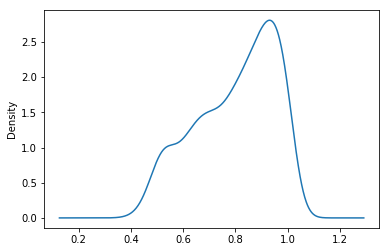

In [3]:
abx_all['score'].plot(kind='kde')

In [4]:
call2species = {'1':'PN', '2':'PN', '3':'PN', '4':'PN', 
                'A':'BM', 'A*':'BM', 'KA':'BM', 'h':'BM', 'p':'BM',
                'KATR':'BM', 'Nscrm':'BM', 'PY':'BM', 'BO':'BM',
                'A_titi':'TT', 'B':'TT', 'BS':'TT', 'Bw':'TT',  'C':'TT', 'H':'TT', 'x':'TT',  
                'H':'CB', 'K':'CB', 'K+':'CB', 'W':'CB', 'W+':'CB', 'K+/W+':'CB',                 
                'r':'CL', 's':'CL'}
abx_all['call_2_specie'] = [call2species[x] for x in abx_all['call_2']]
abx_all['call_1_specie'] = [call2species[x] for x in abx_all['call_1']]


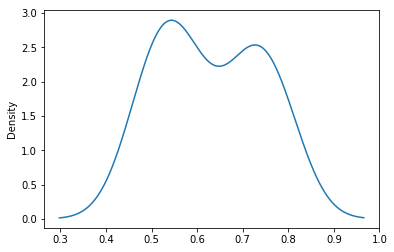

In [5]:
species = ['CB', 'CL']
species = ['CB']
selected_abx = abx_all[(abx_all['call_2_specie'].isin(species)) & (abx_all['call_1_specie'].isin(species))]
selected_abx['score'].plot(kind='kde')

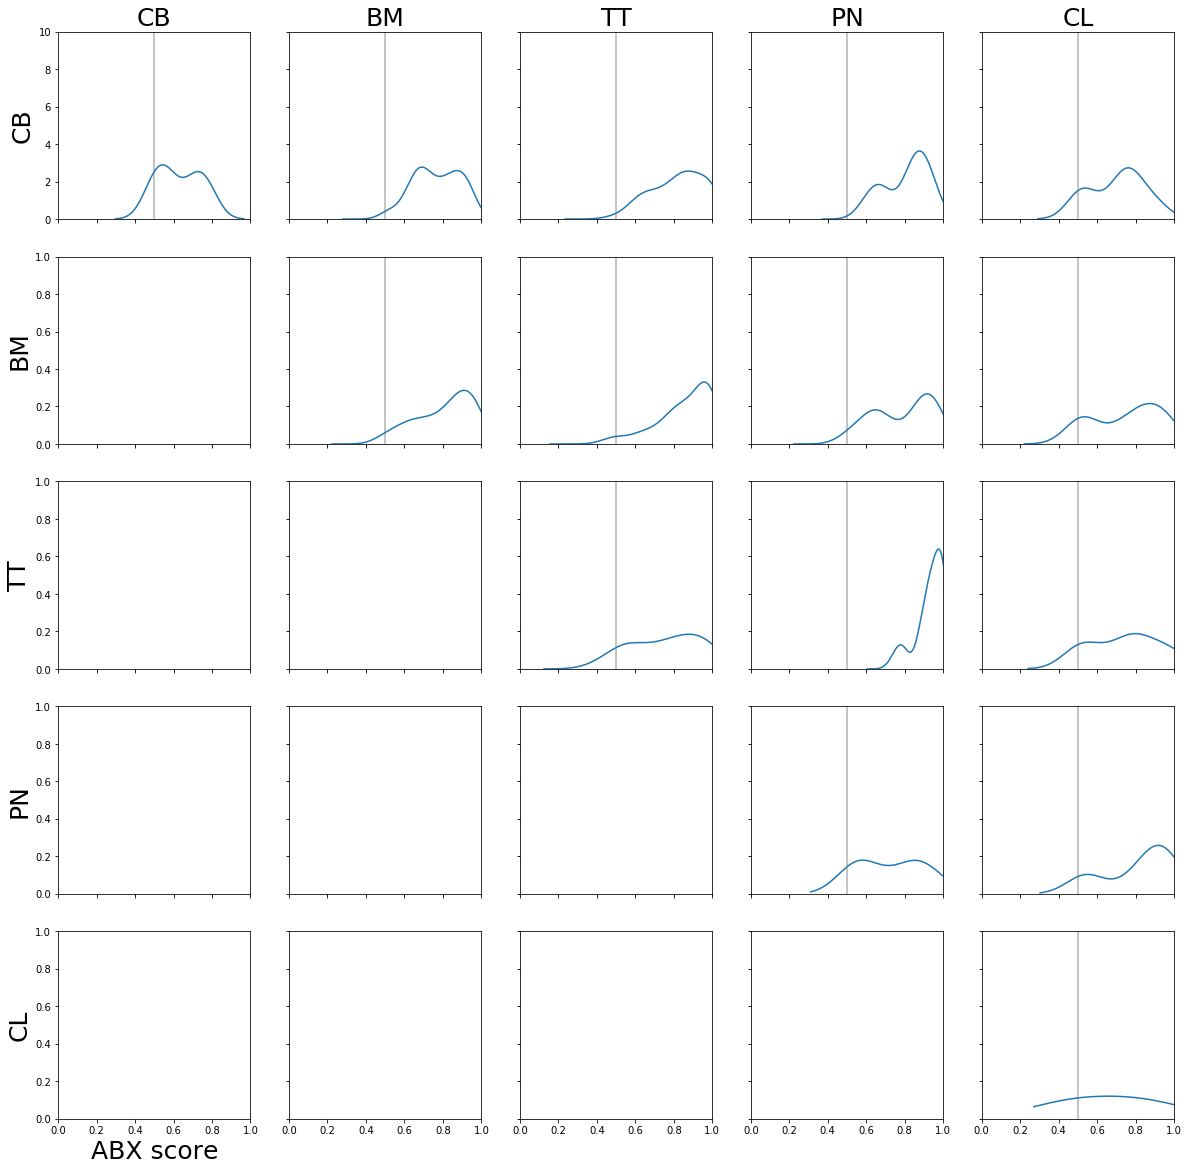

In [9]:
all_species = abx_all['call_2_specie'].unique()
num_species = len(all_species)

fig, axes = plt.subplots(nrows=num_species, ncols=num_species, figsize=(20, 20))
param = {'kind':'kde', 'xlim':(0, 1.0), 'ylim':(0,10), 'sharex':True, 'sharey':True} 

for i, (sp_1_idx, sp_2_idx) in enumerate(combinations_with_replacement(range(num_species), 2)):
    sp_1, sp_2 = all_species[sp_1_idx], all_species[sp_2_idx] 
    selected = abx_all.query('((call_1_specie == @sp_1) & (call_2_specie == @sp_2))|((call_2_specie == @sp_1) & (call_1_specie == @sp_2))')
    axes[sp_1_idx, sp_2_idx].plot([0.5, 0.5], [0, 10], color='0.7')
    selected['score'].plot(ax=axes[sp_1_idx, sp_2_idx], **param)
    
axes[num_species-1, 0].set_xlabel("ABX score", fontsize=25)
for m in range(num_species):
    axes[m, 0].set_ylabel('{}'.format(all_species[m]), fontsize=25)
    axes[0, m].set_title('{}'.format(all_species[m]), fontsize=25)


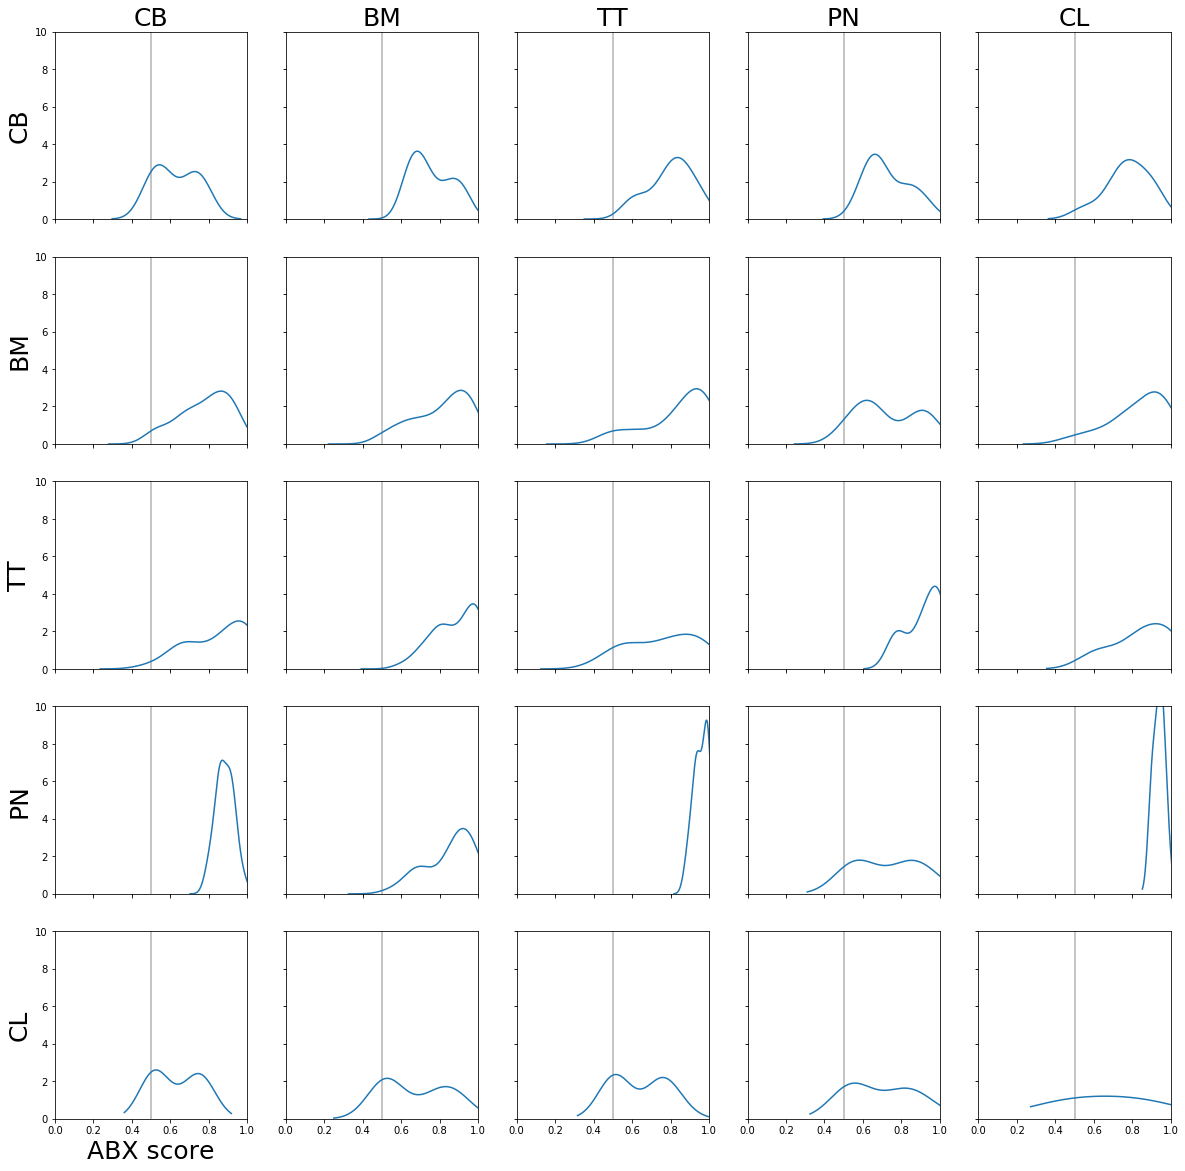

In [10]:
all_species = abx_all['call_2_specie'].unique()
num_species = len(all_species)

fig, axes = plt.subplots(nrows=num_species, ncols=num_species, figsize=(20, 20))
param = {'kind':'kde', 'xlim':(0, 1.0), 'ylim':(0,10), 'sharex':True, 'sharey':True} 

for i, (sp_1_idx, sp_2_idx) in enumerate(product(range(num_species), range(num_species))):
    sp_1, sp_2 = all_species[sp_1_idx], all_species[sp_2_idx]
    selected = abx_all.query('(call_1_specie == @sp_1) & (call_2_specie == @sp_2)')
    axes[sp_1_idx, sp_2_idx].plot([0.5, 0.5], [0, 10], color='0.7')
    selected['score'].plot(ax=axes[sp_1_idx, sp_2_idx], **param)
    
axes[num_species-1, 0].set_xlabel("ABX score", fontsize=25)
for m in range(num_species):
    axes[m, 0].set_ylabel('{}'.format(all_species[m]), fontsize=25)
    axes[0, m].set_title('{}'.format(all_species[m]), fontsize=25)

In [ ]:
selected_abx = abx_all[((abx_all['call_2_specie'].isin(['TT'])) & (abx_all['call_1_specie'].isin(['PN']))) |
                      ((abx_all['call_2_specie'].isin(['TT'])) & (abx_all['call_2_specie'].isin(['PN'])))]
selected_abx['score'].plot(kind='kde')